### Audio files are processed. Used Librosa and MFCC to extract features from the audio files. 

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import IPython.display as ipd
import os
from tqdm import tqdm

In [2]:
data=pd.read_csv('../input/urbansound8k/UrbanSound8K.csv')
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [3]:
data['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

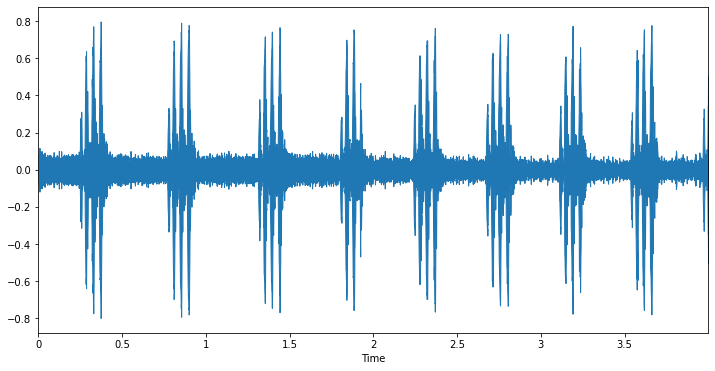

In [4]:
filename='../input/urbansound8k/fold9/101729-0-0-1.wav'
plt.figure(figsize=(12,6))
trial_audio_data,trial_sample_rate=librosa.load(filename)
librosa.display.waveplot(trial_audio_data,sr=trial_sample_rate)
ipd.Audio(filename)

In [7]:
mfccs = librosa.feature.mfcc(y=trial_audio_data, sr=trial_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [8]:
audio_dataset_path='../input/urbansound8k'
metadata=pd.read_csv('../input/urbansound8k/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [9]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [10]:
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [07:34,  7.53it/s]/opt/conda/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8324it [17:14, 11.19it/s]/opt/conda/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
8327it [17:14, 14.61it/s]/opt/conda/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [18:02,  8.07it/s]


In [11]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.180405,...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [13]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [17]:
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## ANN

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [22]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(y.shape[1]))
model.add(Activation('softmax'))


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [23]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - 1s 5ms/step - loss: 0.9326 - accuracy: 0.6875 - val_loss: 0.7497 - val_accuracy: 0.7733

Epoch 00001: val_loss improved from inf to 0.74966, saving model to saved_models/audio_classification.hdf5
Epoch 2/100
219/219 [==============================] - 1s 5ms/step - loss: 0.9382 - accuracy: 0.6971 - val_loss: 0.7419 - val_accuracy: 0.7670

Epoch 00002: val_loss improved from 0.74966 to 0.74189, saving model to saved_models/audio_classification.hdf5
Epoch 3/100
219/219 [==============================] - 1s 5ms/step - loss: 0.9356 - accuracy: 0.6901 - val_loss: 0.7291 - val_accuracy: 0.7853

Epoch 00003: val_loss improved from 0.74189 to 0.72907, saving model to saved_models/audio_classification.hdf5
Epoch 4/100
219/219 [==============================] - 1s 5ms/step - loss: 0.9277 - accuracy: 0.6853 - val_loss: 0.7300 - val_accuracy: 0.7705

Epoch 00004: val_loss did not improve from 0.72907
Epoch 5/100
219/219 [=======================

In [28]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7979393005371094


In [31]:
y_predict = np.argmax(model.predict(X_test), axis=1)

In [40]:
y_predict.shape

(1747,)

In [54]:
filename="../input/trial-audio-2/dog_barking_1.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=np.argmax(model.predict(mfccs_scaled_features),axis=1)
print("Predicted Label:",predicted_label)
prediction_class = labelencoder.inverse_transform(np.array(predicted_label))
print(prediction_class)
ipd.Audio(filename)

[-3.4883664e+02  1.2620513e+02 -9.3121157e+00 -6.7788544e+00
 -2.9355495e+01 -9.4216480e+00 -1.6732927e+01 -2.2042336e+01
 -1.3975120e+01 -1.0035088e+01  6.0748201e-02 -6.7893858e+00
 -1.0918142e+00  1.4123859e+00 -3.0750868e+00 -7.5557389e+00
 -4.2188864e+00  7.7908534e-01 -3.4834828e+00 -2.9565606e+00
 -6.0840793e+00 -1.7884221e+00  1.7088313e+00 -1.5863231e+00
 -1.4767512e+00 -2.1051526e+00 -7.4758750e-01 -2.6841929e+00
 -2.8306642e+00 -1.5074987e+00 -2.9427667e+00 -2.1909206e+00
  6.5240666e-02  6.4456725e-01 -4.4989339e-01 -3.0724484e-01
 -5.7037812e-01 -4.2519379e-01 -8.0444038e-01 -6.5290743e-01]
[[-3.4883664e+02  1.2620513e+02 -9.3121157e+00 -6.7788544e+00
  -2.9355495e+01 -9.4216480e+00 -1.6732927e+01 -2.2042336e+01
  -1.3975120e+01 -1.0035088e+01  6.0748201e-02 -6.7893858e+00
  -1.0918142e+00  1.4123859e+00 -3.0750868e+00 -7.5557389e+00
  -4.2188864e+00  7.7908534e-01 -3.4834828e+00 -2.9565606e+00
  -6.0840793e+00 -1.7884221e+00  1.7088313e+00 -1.5863231e+00
  -1.4767512e+00 